# Regresión Lineal

La **Regresión Lineal** es un modelo matemático usado para aproximar la relación de dependencia entre variables una dependiente y una o más independientes. Esta relación obtenida (modelo de datos) de valores observables es usada para predecir nuevos valores.

Existen dos tipos de regresión lineal, *Simple* y *Múltiple*

- **Regresion lineal simple**: Predicción de una variable de respuesta cuantitativa a partir de una variable predictora cuantitativa
- **Regresion lineal múltiple**: Predicción de una variable de respuesta cuantitativa a partir de dos o más variables predictoras cuantitativas

## Regresión Lineal Simple

Es la primer aproximación cuando tenemos solo una variable dependiente y una independiente. Se basa en realizar un aproximación usando la ecuación básica de una recta, y reducir al máximo el error cuadrático de la linea.

$$ Y_i = (\alpha + \beta X_i) + \epsilon_i $$

Dónde:

- **a**: Punto de corte en el eje de ordenadas

- **b**: Pendiente o gradiente de la recta, que son los coeficientes de regresión
- $\epsilon_i$: Corresponde al término de resíduos, que representa la diferencia entre el valor observado y el estimado para el individuo *i*

Es decir, para un conjunto de **n** puntos observados $(x_i, y_i)$ podemos decir que la mejor linea que pasa por ellos es la minimice la sumatoria de los errores cuadráticos de los valores observados y los valores estimados. En otras palabras, se debe minimizar la siguiente ecuación.

$$ \sum_i^n e_i^2 = \sum_{i}^n (y_i - (\alpha + \beta x_i))^2 $$

Dónde
- $y_i$: Es el valor observado para cada $x_i$
- $\alpha - \beta x_i$: Es el valor estimado

Los coeficientes de la regresión se obtienen al derivar la ecuación anterior con respecto a $\alpha$ y $\beta$ y resolver el sistema de ecuaciones surgido.

$$ \beta = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{y})^2} = \frac{\sum xy - \frac{\sum x \sum y}{n}}{\sum x^2 - \frac{(\sum x)^2}{n}} $$

$$ \alpha = \bar{y} - \beta \bar{x} = \frac{\sum y}{n} - \beta \frac{\sum x}{n}$$

[Demostración](https://es.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line)

### Implementación

In [183]:
from typing import List
Samples = List[tuple]

def simple_linear_regression(samples: Samples) -> tuple:
    """Simple linear regresion.

    Args:
        samples: List of vales x, y.

    Returns:
        Values for a, b.
    """
    X = 0
    Y = 0
    X2 = 0
    XY = 0
    n = 0
    
    for xi, yi in samples:
        X += xi
        Y += yi
        X2 += xi * xi
        XY += xi * yi
        n += 1
    
    b = ( XY - (Y * X) / n ) / ( X2 - (X * X) / n )
    a = ( Y - b * X) / n
    
    return a, b

### Ejemplo 1

Generemos una nube de puntos (x, y).

In [143]:
%matplotlib inline
import random
sample_size = 100
X = [i for i in range(sample_size)]
Y = [i + random.randint(-50, 50) for i in range(sample_size)]

Visualizamos la nube de puntos para ver la correlación existente

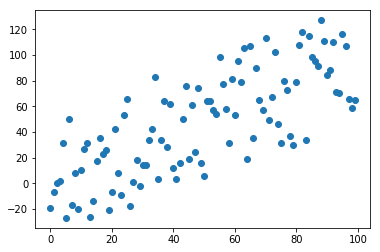

In [144]:
plot.scatter(X, Y)

Creamos nuestro lista de muestras con los puntos anteriores

In [145]:
samples = [(x, y) for (x, y) in enumerate(Y)]

Obtenemos los valores de $\alpha$ y $\beta$ para formar nuestro modelo de regresión.

In [146]:
a, b = simple_linear_regression(samples)
print('y = %f + %fx' % (a, b))

y = -3.914851 + 1.033633x


Evaluamos nuestro modelo para obtener los valores estimados de $y$

In [157]:
Xe = X
Ye = [(a + b*x) for x in range(sample_size)]

Graficamos nuestra nube de puntos y nuestro modelo

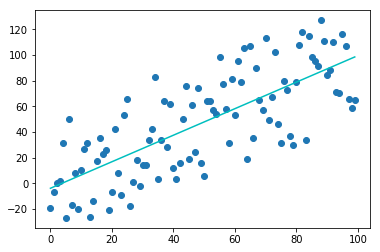

In [158]:
plot.scatter(X, Y)
plot.plot(Xe, Ye, color='c')
plot.show()

### Ejemplo 2.  Usando sklearn

Importamos la biblioteca de *LinearRegression* del módulo de *sklearn*, y creamos nuestro objeto de regresión.

In [153]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Ajustamos nuestro regresor con la muestra generada y obtenemos los datos estimados para comparar

In [182]:
regressor.fit([[x] for x in X], Y)
print('y = %f + %f x' % (regressor.intercept_, regressor.coef_[0]))

y = -3.914851 + 1.033633 x


La ecuación anterior es la misma que obtuvimos en el ejemplo 1 de la forma manual

Graficamos para comparar la muestra con la aproximación

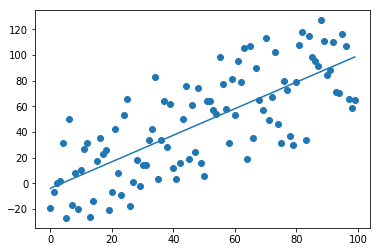

In [181]:
Ye = regressor.predict([[x] for x in X])
plot.scatter(X, Y)
plot.plot(X, Ye)
plot.show()

## Regresión lineal múltiple

Es la generalización de la Regresión Lineal Simple. En la Regresión Lineal Múltiple tenemos más de una variable independiente. Es decir el modelo de regresión lineal tiene la siguiente forma.

$$ y = \alpha + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... + \beta_k x_k + \epsilon $$

Generalizando, si tenemos **n** muestras y **k** variables, entonces.

$$ y_i = \alpha + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i3} + ... + \beta_k x_{ik} + \epsilon$$

Como has de suponer la condición $ n > k $ debe complirse puesto que necesitamos al menos $k+1$ puntos para poner representar una serie de ecuaciones para *k* variables.

Al igual que el anterior nuestra meta es encontrar el hiperplano (ya estamos tratando con más de dos dimenciones) que mejor se ajuste a a los puntos y minimize el error cuadrático. En otras palabras minimizar la siguiente fórmula.

$$ \sum_i^n e_i^2 = \sum_{i}^n (y_i - \alpha - \sum_j^k \beta_j x_{ij})^2 $$

Realizando las derivadas parciales para cada $\beta_j$ obtenemos un sistema de ecuaciones cuya solución conviene representarla en un sistema de vectores y matrices

### Ejemplo

    Usaremos un dataset de prueba que contiene el precio y otros parámetros de casas en Boston, lo descargamos con el siguiente comando

In [2]:
!python -m wget "http://forge.scilab.org/index.php/p/rdataset/source/file/master/csv/MASS/Boston.csv" -o ../data/external

100% [..........................................................] 37658 / 37658
Saved under ../data/external/Boston (1).csv


In [32]:
import pandas
import matplotlib.pyplot as plot

In [5]:
file_dir = '../data/external/Boston.csv'
dataset = pandas.read_csv(file_dir)
dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Las etiquetas *crim* y *medv* nos indican la tasa de crimen percápita y el costo de la casa respectivamente

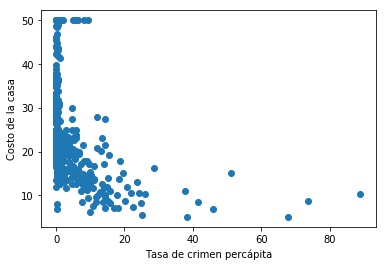

In [6]:
plot.xlabel('Tasa de crimen percápita')
plot.ylabel('Costo de la casa')
plot.scatter(dataset['crim'], dataset['medv'])

En la gráfica podemos notar la relación entre el costo de la casa el la tasa del crimen percápita, mientras la tasa de crimen aumenta el costo de la casa disminuye, a excepción de los primeros datos (de izquierda a derecha) que tienen un comportamiento aleatoreo.

In [7]:
X = dataset.drop(['Unnamed: 0', 'medv'], axis=1)
X
y = dataset['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train, y_text, y_train, y_test = train_test_split(X, y)
x_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44
122,0.09299,0.0,25.65,0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09,17.93
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264,13.0,388.37,7.26
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
162,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92
344,0.03049,55.0,3.78,0,0.484,6.874,28.1,6.4654,5,370,17.6,387.97,4.61
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81
300,0.04417,70.0,2.24,0,0.400,6.871,47.4,7.8278,5,358,14.8,390.86,6.07
192,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80


Referencias:
- http://www.ccg.unam.mx/~vinuesa/R4biosciences/docs/Tema9_regresion.html#tipos-de-regresion
- Data Science from Scratch with Python, Peter Morgan
- http://mezeylab.cb.bscb.cornell.edu/labmembers/documents/supplement%205%20-%20multiple%20regression.pdf